<a href="https://colab.research.google.com/github/kathdevx/emotionalAI/blob/main/test_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install soundfile
from google.colab import drive
drive.mount('/content/drive')

In [20]:
anger_dir = '/content/drive/Shareddrives/DNN -  audio files/anger/'
disgust_dir = '/content/drive/Shareddrives/DNN -  audio files/disgust/'
fear_dir = '/content/drive/Shareddrives/DNN -  audio files/fear/'
happiness_dir = '/content/drive/Shareddrives/DNN -  audio files/happiness/'
sadness_dir = '/content/drive/Shareddrives/DNN -  audio files/sadness/'

dirs = [anger_dir, disgust_dir, fear_dir, happiness_dir, sadness_dir]

In [96]:
import soundfile as sf
import glob
anger = []
disgust = []
fear = []
happiness = []
sadness = []

for direc in dirs: 
    for filename in glob.glob(direc+'*.wav'):
        if direc == anger_dir:
            f = sf.SoundFile(filename)
            anger.append(f)
        if direc == disgust_dir:
            f = sf.SoundFile(filename)
            disgust.append(f)
        if direc == fear_dir:
            f = sf.SoundFile(filename)
            fear.append(f)
        if direc == happiness_dir:
            f = sf.SoundFile(filename)
            happiness.append(f)
        if direc == sadness_dir:
            try:
                f = sf.SoundFile(filename)
            except RuntimeError:
                continue
            sadness.append(f)

In [97]:
X = anger + disgust + fear + happiness + sadness 
Y = [1]*len(anger) + [2]*len(disgust) + [3]*len(fear) + [4]*len(happiness) + [5]*len(sadness)

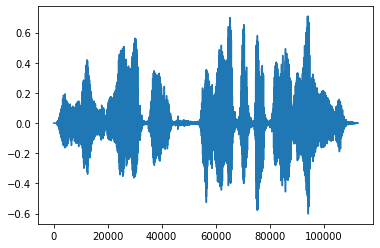

In [71]:
import matplotlib.pyplot as plt

test1 = happiness[3]

plt.plot(test1)

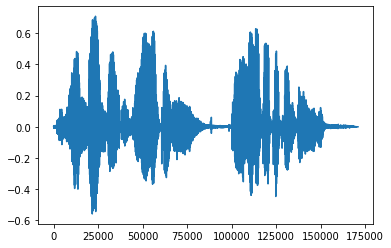

In [82]:
test2 = sadness[3]

plt.plot(test2)

In [92]:
from keras.models import Model
from keras import layers as l

def emotionalModel(input_shape):

    inputs = l.Input(shape=input_shape)

    conv1_10 = l.Conv2D(filters=10, kernel_size=(9,1), activation='relu')(inputs)
    conv2_10 = l.Conv2D(filters=10, kernel_size=(2,1), activation='relu')(conv1_10)
    conv3_10 = l.Conv2D(filters=10, kernel_size=(3,1), activation='relu')(conv2_10)

    pool_1 = l.MaxPool2D(pool_size=(3,1))(conv3_10)
    bn_1 = l.BatchNormalization()(pool_1)

    conv1_40 = l.Conv2D(filters=40, kernel_size=(3,1), activation='relu')(bn_1)
    conv2_40 = l.Conv2D(filters=40, kernel_size=(3,1), activation='relu')(conv1_40)

    pool_2 = l.MaxPool2D(pool_size=(2,1))(conv2_40)
    bn_2 = l.BatchNormalization()(pool_2)

    conv1_80 = l.Conv2D(filters=80, kernel_size=(13,1), activation='relu')(bn_2)
    conv2_80 = l.Conv2D(filters=80, kernel_size=(1,1), activation='relu')(conv1_80)

    pool_3 = l.MaxPool2D(pool_size=(2,1))(conv2_80)
    bn_3 = l.BatchNormalization()(pool_3)

    conv3_80 = l.Conv2D(filters=80, kernel_size=(1,1), activation='relu')(bn_3)

    dense_1 = l.Dense(80)(conv3_80)
    dense_2 = l.Dense(30)(dense_1)

    output = l.Dense(4, activation='softmax')(dense_2)

    return Model(inputs, output)


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
model = emotionalModel((#SPECTROGRAM SHAPE,))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_hist = model.fit(X_train, y_train, epochs=10, verbose=0)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")